# importing necessary libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist # load dataset
(train_images,train_labels) , (test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# exploring dataset

In [5]:
train_images.shape

(60000, 28, 28)

In [8]:
train_images[0,15]

array([  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
       207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
       159,   0], dtype=uint8)

In [11]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [12]:
class_names = ['t-shirt', 'trouser','pullover','dress','coat',
              'sandal','shirt','sneaker','bag','ankle boot']

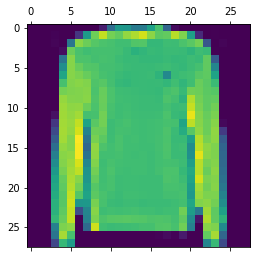

In [19]:
plt.matshow(train_images[934])

# Data - Preprocessing

In [20]:
train_images = train_images / 255
test_images = test_images / 255

# Building The Model

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer
    keras.layers.Dense(128, activation='relu'), #hidden layer
    keras.layers.Dense(10, activation='softmax') #output layer
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [36]:
model.fit(train_images, train_labels, epochs = 6)

Epoch 1/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4959 - accuracy: 0.8249
Epoch 2/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3750 - accuracy: 0.8648
Epoch 3/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3342 - accuracy: 0.8777
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3074 - accuracy: 0.8873
Epoch 5/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2914 - accuracy: 0.8925
Epoch 6/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2770 - accuracy: 0.8974


# evaluating the model

In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuaracy = ",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3292 - accuracy: 0.8823
Test Accuaracy =  0.8823000192642212


After hyper-parameter tunning, our training accuracy (i.e., 89.7%) and testing accuracy (i.e., 88.2%) are someline some with each other that means our model is not overfitting.

# making predictions

In [41]:
predictions = model.predict(test_images)
print(predictions) #print probability of every single item for the output

313/313 [==============================] - 1s 2ms/step
[[6.7956439e-06 1.1813146e-08 4.8228719e-07 ... 2.7847497e-02
  1.9103963e-07 9.6858114e-01]
 [1.0004833e-05 1.0821412e-11 9.9583375e-01 ... 1.2042059e-14
  3.8616028e-07 2.2914263e-11]
 [7.2248007e-08 9.9999988e-01 1.6973125e-09 ... 3.9296466e-22
  8.4558388e-11 6.4430044e-15]
 ...
 [1.4500866e-04 4.4514525e-09 2.3636789e-04 ... 1.3073414e-07
  9.9843949e-01 1.5544913e-09]
 [9.1832510e-07 9.9996519e-01 1.3664975e-07 ... 1.6797291e-11
  9.0036771e-08 3.7601033e-09]
 [3.5583322e-05 1.0195336e-07 2.2961069e-05 ... 2.2748908e-02
  6.7290867e-04 5.2956082e-05]]


In [42]:
predictions[2]

array([7.2248007e-08, 9.9999988e-01, 1.6973125e-09, 6.1733343e-09,
       4.9328452e-09, 2.2786798e-16, 1.2891599e-10, 3.9296466e-22,
       8.4558388e-11, 6.4430044e-15], dtype=float32)

In [49]:
class_names[np.argmax(predictions[2156])]

'pullover'

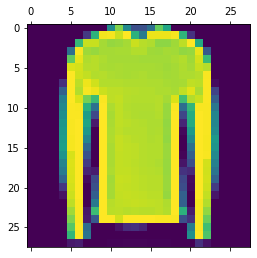

In [50]:
plt.matshow(test_images[2156])